# Question 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [2]:
def ndRandn(mean, cov, num=1):
    """
    Generates a set of samples drawn from a multidimensional 
    Gaussian distribution with the specified mean (an N-vector)
    and covariance (an NxN matrix). The parameter num specifies
    the number of samples to return (default is 1).
    Args:
        mean: The mean of the multidimensional Gaussian 
            distribution (an N-vector)
        cov: The covariance of the multidimensional Gaussian
            distribution (an NXN matrix)
        num: Number of samples to return (default is 1)
    Returns:
        samples: A set of samples drawn from a multidimensional 
            Gaussian distribution (stored as a 2D numpy array)
    """
    samples = []
    N = np.size(cov, 0)
    zero_mean = np.zeros(N)
    ident_cov = np.identity(N)
    for _ in range(num):
        # Prepare a zero mean, unit covariance sample, that will later be adjusted
        sample_ident_cov = np.random.multivariate_normal(zero_mean, ident_cov)
        # We can use Cholesky decomposition (a special case of SVD), since
        # every covariance matrix must be symmetric and positive semidefinite
        Y = np.linalg.cholesky(cov).T
        # Adjust the sample to have the specified mean and covariance
        sample = sample_ident_cov.dot(Y)
        sample += mean
        samples.append(sample)
    return np.array(samples)

In [3]:
def get_confidence_ellipse(sample_mean, sample_cov):
    """
    Generates the 95% (value by convention) confidence ellipse
    for the data drawn from a particular 2-dimensional Gaussian
    Distribution.  
    Args:
        sample_mean: The mean of the 2-dimensional Gaussian 
            distribution samples (a 2-vector)
        sample_cov: The covariance of the 2-dimensional Gaussian
            distribution samples(a 2X2 matrix)
    Returns:
        confidence_ellipse: The Ellipse object representing
            the 95% confidence ellipse
    """
    eigvals, eigvecs = np.linalg.eig(sample_cov)
    descending_order = eigvals.argsort()[::-1]
    eigvals = eigvals[descending_order]
    eigvecs = eigvecs[descending_order]
    theta = np.rad2deg(-np.arctan2(eigvecs[0, 1], eigvecs[0, 0]))
    confidence_constant = np.sqrt(5.991)
    width = np.sqrt(eigvals[0]) * 2 * confidence_constant
    height = np.sqrt(eigvals[1]) * 2 * confidence_constant
    error_ellipse = Ellipse(xy=sample_mean, width=width, height=height,
                            angle=theta, edgecolor='r', fc='None', lw=2)
    return error_ellipse

Mean of the samples is:
 [ 1.92462339 10.10750595]
Covariance of the samples is:
 [[ 1.0605496  -1.09218809]
 [-1.09218809  4.00410068]]


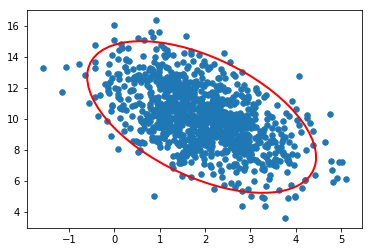

In [4]:
mean = np.array([2, 10])
cov = np.array([[1, -1],
                [-1, 4]])
samples = ndRandn(mean, cov, 1000)
sample_mean = np.mean(samples, axis=0)
print('Mean of the samples is:\n', sample_mean)
sample_cov = np.cov(samples, rowvar=False)
print('Covariance of the samples is:\n', sample_cov)
x = [sample[0] for sample in samples]
y = [sample[1] for sample in samples]
plt.scatter(x, y, s=30)
confidence_ellipse = get_confidence_ellipse(sample_mean, sample_cov)
plt.gca().add_patch(confidence_ellipse)